# Installation and Setup

In [2]:
import h2o
import fairlearn
import pandas as pd
from fairlearn.metrics import MetricFrame, selection_rate, true_positive_rate, true_negative_rate, false_positive_rate, false_negative_rate
from sklearn.metrics import accuracy_score, balanced_accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Start the H2O cluster (locally)
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM Microsoft-10376486 (build 17.0.13+11-LTS, mixed mode, sharing)
  Starting server from D:\OneDrive\Repos\employee-attrition-ibm\.venv\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\user\AppData\Local\Temp\tmp7miua2lj
  JVM stdout: C:\Users\user\AppData\Local\Temp\tmp7miua2lj\h2o_user_started_from_python.out
  JVM stderr: C:\Users\user\AppData\Local\Temp\tmp7miua2lj\h2o_user_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Asia/Kuala_Lumpur
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,4 months and 25 days
H2O_cluster_name:,H2O_from_python_user_n44sdq
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.971 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [4]:
# Upload test data
test = h2o.import_file("../data/processed/test_set.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Model Evaluation

## Model 1 - Without Balancing Classes

In [33]:
model1_path = "../models/allfeatures/2025-03-26_20-50-35/cv/StackedEnsemble_AllModels_1_AutoML_1_20250326_194124"
best_model1 = h2o.upload_model(model1_path)

### Threshold based on Max F1

In [34]:
# Get threshold at max f1 in CV
max_f1_threshold1 = best_model1.find_threshold_by_max_metric(xval=True, metric="f1")

# Check model performance on cv data at threshold
cv_perf = best_model1.model_performance(xval=True)

# Print confusion matrix
print("Cross Validation Performance:")
cv_perf.confusion_matrix(thresholds=max_f1_threshold1)

Cross Validation Performance:


,0,1,Error,Rate
0,806.0,43.0,0.0506,(43.0/849.0)
1,90.0,90.0,0.5,(90.0/180.0)
Total,896.0,133.0,0.1293,(133.0/1029.0)


In [35]:
# Check model performance on test data at threshold
test_perf = best_model1.model_performance(test_data=test)

# Print confusion matrix
print("Test Performance")
test_perf.confusion_matrix(thresholds=max_f1_threshold1)

Test Performance
Could not find exact threshold 0.40397453072105804; using closest threshold found 0.407091458420444.


,0,1,Error,Rate
0,370.0,14.0,0.0365,(14.0/384.0)
1,25.0,32.0,0.4386,(25.0/57.0)
Total,395.0,46.0,0.0884,(39.0/441.0)


### Threshold based on Max Absolute MCC

In [36]:
# Get threshold at max abs mcc in CV
max_mcc_threshold1 = best_model1.find_threshold_by_max_metric(xval=True, metric="absolute_mcc")

# Check model performance on cv data at threshold
cv_perf = best_model1.model_performance(xval=True)

# Print confusion matrix
print("Cross Validation Performance:")
cv_perf.confusion_matrix(thresholds=max_mcc_threshold1)

Cross Validation Performance:


,0,1,Error,Rate
0,806.0,43.0,0.0506,(43.0/849.0)
1,90.0,90.0,0.5,(90.0/180.0)
Total,896.0,133.0,0.1293,(133.0/1029.0)


In [37]:
# Check model performance on test data at threshold
test_perf1 = best_model1.model_performance(test_data=test)

# Print confusion matrix
print("Test Performance:")
test_perf1.confusion_matrix(thresholds=max_mcc_threshold1)

Test Performance:
Could not find exact threshold 0.40397453072105804; using closest threshold found 0.407091458420444.


,0,1,Error,Rate
0,370.0,14.0,0.0365,(14.0/384.0)
1,25.0,32.0,0.4386,(25.0/57.0)
Total,395.0,46.0,0.0884,(39.0/441.0)


## Model 2 - Balancing Classes

In [38]:
model2_path = "../models/balanceclasses/2025-03-26_23-07-06/cv/GLM_1_AutoML_1_20250326_214224"
best_model2 = h2o.upload_model(model2_path)

### Threshold based on Max F1

In [39]:
# Get threshold at max f1 in CV
max_f1_threshold2 = best_model2.find_threshold_by_max_metric(xval=True, metric="f1")

# Check model performance on cv data at threshold
cv_perf = best_model2.model_performance(xval=True)

# Print confusion matrix
print("Cross Validation Performance:")
cv_perf.confusion_matrix(thresholds=max_f1_threshold2)

Cross Validation Performance:


,0,1,Error,Rate
0,747.0,102.0,0.1201,(102.0/849.0)
1,64.0,116.0,0.3556,(64.0/180.0)
Total,811.0,218.0,0.1613,(166.0/1029.0)


In [40]:
# Check model performance on test data at threshold
test_perf = best_model2.model_performance(test_data=test)

# Print confusion matrix
print("Test Performance:")
test_perf.confusion_matrix(thresholds=max_f1_threshold2)

Test Performance:
Could not find exact threshold 0.29094148384395147; using closest threshold found 0.2920390160887809.


,0,1,Error,Rate
0,344.0,40.0,0.1042,(40.0/384.0)
1,14.0,43.0,0.2456,(14.0/57.0)
Total,358.0,83.0,0.1224,(54.0/441.0)


### Threshold based on Max Absolute MCC

In [41]:
# Get threshold at max abs mcc in CV
max_mcc_threshold2 = best_model2.find_threshold_by_max_metric(xval=True, metric="absolute_mcc")

# Check model performance on cv data at threshold
cv_perf = best_model2.model_performance(xval=True)

# Print confusion matrix
print("Cross Validation Performance:")
cv_perf.confusion_matrix(thresholds=max_mcc_threshold2)

Cross Validation Performance:


,0,1,Error,Rate
0,779.0,70.0,0.0824,(70.0/849.0)
1,79.0,101.0,0.4389,(79.0/180.0)
Total,858.0,171.0,0.1448,(149.0/1029.0)


In [42]:
# Check model performance on test data at threshold
test_perf2 = best_model2.model_performance(test_data=test)

# Print confusion matrix
print("Test Performance:")
test_perf2.confusion_matrix(thresholds=max_mcc_threshold2)

Test Performance:
Could not find exact threshold 0.34765540856013377; using closest threshold found 0.3470679034376445.


,0,1,Error,Rate
0,361.0,23.0,0.0599,(23.0/384.0)
1,16.0,41.0,0.2807,(16.0/57.0)
Total,377.0,64.0,0.0884,(39.0/441.0)


## Comparison

In [55]:
# Based on Max F1

# Get model performance objects
perf_model1 = test_perf1
perf_model2 = test_perf2

# Define thresholds for each model (from confusion matrices)
threshold1 = max_f1_threshold1
threshold2 = max_f1_threshold2

# Extract metrics at specific thresholds
metrics = {
    "Metric": ["F1 Score", "MCC", "TPR (Recall)", "FPR", "Precision", "Accuracy"],
    "Model 1": [
        perf_model1.F1(thresholds=[threshold1])[0][1],
        perf_model1.mcc(thresholds=[threshold1])[0][1],
        perf_model1.recall(thresholds=[threshold1])[0][1],
        perf_model1.fpr(thresholds=[threshold1])[0][1],
        perf_model1.precision(thresholds=[threshold1])[0][1],
        perf_model1.accuracy(thresholds=[threshold1])[0][1],
    ],
    "Model 2": [
        perf_model2.F1(thresholds=[threshold2])[0][1],
        perf_model2.mcc(thresholds=[threshold2])[0][1],
        perf_model2.recall(thresholds=[threshold2])[0][1],
        perf_model2.fpr(thresholds=[threshold2])[0][1],
        perf_model2.precision(thresholds=[threshold2])[0][1],
        perf_model2.accuracy(thresholds=[threshold2])[0][1],
    ],
}

# Create a DataFrame
df_metrics = pd.DataFrame(metrics)

# Display the table
print("CV-selected Threshold Based on Max F1:")
print(df_metrics)

Could not find exact threshold 0.40397453072105804; using closest threshold found 0.407091458420444.
Could not find exact threshold 0.40397453072105804; using closest threshold found 0.407091458420444.
Could not find exact threshold 0.40397453072105804; using closest threshold found 0.407091458420444.
Could not find exact threshold 0.40397453072105804; using closest threshold found 0.407091458420444.
Could not find exact threshold 0.40397453072105804; using closest threshold found 0.407091458420444.
Could not find exact threshold 0.40397453072105804; using closest threshold found 0.407091458420444.
Could not find exact threshold 0.29094148384395147; using closest threshold found 0.2920390160887809.
Could not find exact threshold 0.29094148384395147; using closest threshold found 0.2920390160887809.
Could not find exact threshold 0.29094148384395147; using closest threshold found 0.2920390160887809.
Could not find exact threshold 0.29094148384395147; using closest threshold found 0.2920

In [56]:
# Based on Max Absolute MCC

# Get model performance objects
perf_model1 = test_perf1
perf_model2 = test_perf2

# Define thresholds for each model (from confusion matrices)
threshold1 = max_mcc_threshold1
threshold2 = max_mcc_threshold2

# Extract metrics at specific thresholds
metrics = {
    "Metric": ["F1 Score", "MCC", "TPR (Recall)", "FPR", "Precision", "Accuracy"],
    "Model 1": [
        perf_model1.F1(thresholds=[threshold1])[0][1],
        perf_model1.mcc(thresholds=[threshold1])[0][1],
        perf_model1.recall(thresholds=[threshold1])[0][1],
        perf_model1.fpr(thresholds=[threshold1])[0][1],
        perf_model1.precision(thresholds=[threshold1])[0][1],
        perf_model1.accuracy(thresholds=[threshold1])[0][1],
    ],
    "Model 2": [
        perf_model2.F1(thresholds=[threshold2])[0][1],
        perf_model2.mcc(thresholds=[threshold2])[0][1],
        perf_model2.recall(thresholds=[threshold2])[0][1],
        perf_model2.fpr(thresholds=[threshold2])[0][1],
        perf_model2.precision(thresholds=[threshold2])[0][1],
        perf_model2.accuracy(thresholds=[threshold2])[0][1],
    ],
}

# Create a DataFrame
df_metrics = pd.DataFrame(metrics)

# Display the table
print("CV-selected Threshold Based on Max Absolute MCC:")
print(df_metrics)


Could not find exact threshold 0.40397453072105804; using closest threshold found 0.407091458420444.
Could not find exact threshold 0.40397453072105804; using closest threshold found 0.407091458420444.
Could not find exact threshold 0.40397453072105804; using closest threshold found 0.407091458420444.
Could not find exact threshold 0.40397453072105804; using closest threshold found 0.407091458420444.
Could not find exact threshold 0.40397453072105804; using closest threshold found 0.407091458420444.
Could not find exact threshold 0.40397453072105804; using closest threshold found 0.407091458420444.
Could not find exact threshold 0.34765540856013377; using closest threshold found 0.3470679034376445.
Could not find exact threshold 0.34765540856013377; using closest threshold found 0.3470679034376445.
Could not find exact threshold 0.34765540856013377; using closest threshold found 0.3470679034376445.
Could not find exact threshold 0.34765540856013377; using closest threshold found 0.3470

# Model Interpretation

In [45]:
best_model = best_model2

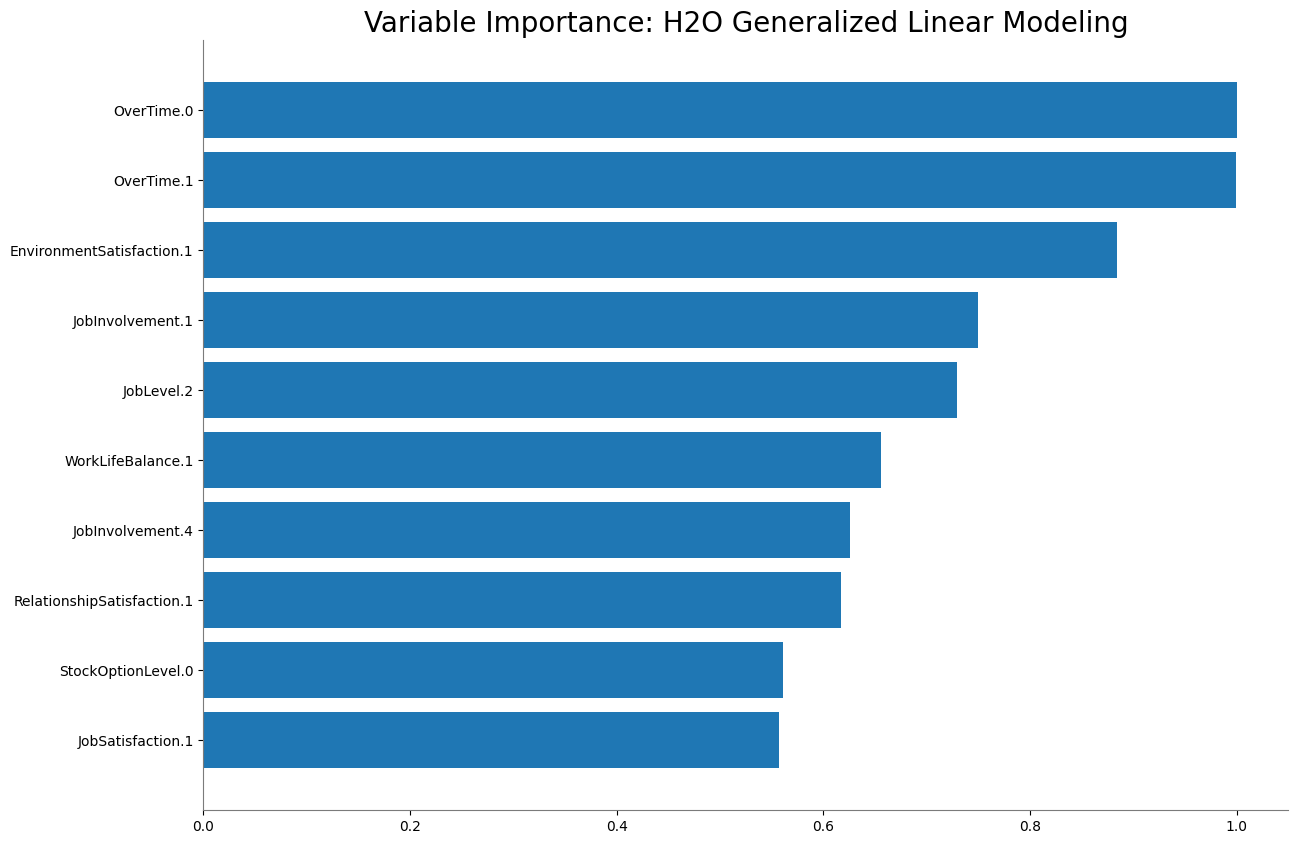

<Figure size 640x480 with 0 Axes>

In [46]:
# Generate the variable importance plot
# best_model2.metalearner().varimp_plot() if it's a stacked ensemble, otherwise as below
best_model.varimp_plot()

In [47]:
# ignore this if it's not stacked ensemble

# varimp_df = best_model.metalearner().varimp(use_pandas=True)  # Get variable importance for metalearner
# dominant_model_id = varimp_df.iloc[0, 0]  # The model with the highest importance

# # Retrieve the dominant base model
# dominant_model = h2o.get_model(dominant_model_id)
# dominant_model.varimp_plot()

In [48]:
best_model.explain(test, include_explanations="shap_summary")
# Not supported for stacked ensembles or GLM (tree based models only)
# use dominant model for stacked ensembles

# Preprocessing Predictions and Test Data

In [49]:
test_decode = test.as_data_frame()
test_decode['Gender'] = test_decode['Gender'].apply(lambda x: 'Male' if x == 0 else 'Female')
test_decode['OverTime'] = test_decode['OverTime'].apply(lambda x: "Yes" if x == 1 else 'No')

d:\OneDrive\Repos\employee-attrition-ibm\.venv\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [50]:
variable_ori_names = ["BusinessTravel", "Department", "EducationField", "JobRole", "MaritalStatus"]

for variable_ori_name in variable_ori_names:
    # Ensure only one-hot encoded columns are used
    one_hot_columns = [col for col in test_decode.columns if variable_ori_name+"_" in col]

    # Apply idxmax only to these columns
    test_decode[variable_ori_name] = test_decode[one_hot_columns].idxmax(axis=1).str.replace(variable_ori_name+"_", "")

    # Drop the original one-hot columns
    test_decode.drop(columns=one_hot_columns, inplace=True)

test_decode


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,ManagementStabilityRatio,JobLevelSalaryRatio,DepartmentSalaryRatio,EducationReturnRatio,Attrition,BusinessTravel,Department,EducationField,JobRole,MaritalStatus
0,-1.195770,1.374230,1.949889,3,1,Male,-0.880062,1,1,3,...,1.000000,0.822773,0.365055,0.351835,1,Travel_Rarely,Research & Development,Life Sciences,Laboratory Technician,Single
1,-0.210589,-0.065638,-1.010565,4,3,Male,-1.667098,2,2,1,...,0.533333,0.783676,0.619614,0.631110,0,Travel_Rarely,Sales,Marketing,Sales Executive,Single
2,-0.210589,-0.298595,1.086423,4,2,Male,0.251303,3,2,1,...,0.800000,1.010672,0.799089,0.813916,0,Travel_Rarely,Sales,Medical,Sales Executive,Married
3,-0.867377,-0.340725,0.716366,3,3,Male,-0.289785,3,1,4,...,0.833333,0.839638,0.372537,0.359046,0,Travel_Rarely,Research & Development,Life Sciences,Research Scientist,Single
4,0.555663,-1.490637,-1.010565,4,2,Female,1.431858,3,1,1,...,0.400000,0.924319,0.410109,0.377027,0,Travel_Rarely,Research & Development,Life Sciences,Laboratory Technician,Divorced
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,-0.867377,-0.526595,-0.640509,3,4,Female,1.235098,2,1,1,...,0.000000,0.756751,0.335761,0.323602,0,Travel_Rarely,Research & Development,Technical Degree,Research Scientist,Divorced
437,1.431380,-0.013595,-0.640509,1,1,Male,1.481047,3,5,2,...,0.600000,0.997508,3.047800,3.393983,0,Travel_Rarely,Research & Development,Life Sciences,Research Director,Divorced
438,-0.648447,-1.371681,-0.393804,4,2,Male,0.497252,1,2,3,...,1.000000,1.121717,0.886887,0.903343,1,Travel_Rarely,Sales,Life Sciences,Sales Executive,Married
439,-0.210589,0.197057,-0.763861,4,4,Male,1.284288,3,3,4,...,0.800000,0.796862,1.124128,1.144985,0,Travel_Rarely,Sales,Life Sciences,Sales Executive,Divorced


In [51]:
# Make predictions # Note take h2o takes the CV threshold
predictions = best_model.predict(test)

# Apply your desired threshold
threshold = max_mcc_threshold2
predictions["predict"] = (predictions["p1"] >= threshold).ifelse(1, 0)

# Convert H2OFrame to Pandas
predictions = predictions.as_data_frame()

#Reset index
predictions.reset_index(drop=True)
test_decode.reset_index(drop=True)

# Merge predictions with test data
merged_df = pd.concat([predictions,test_decode], axis=1)

# Print df
merged_df

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


d:\OneDrive\Repos\employee-attrition-ibm\.venv\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


,predict,p0,p1,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,...,ManagementStabilityRatio,JobLevelSalaryRatio,DepartmentSalaryRatio,EducationReturnRatio,Attrition,BusinessTravel,Department,EducationField,JobRole,MaritalStatus
0,1,0.289832,0.710168,-1.195770,1.374230,1.949889,3,1,Male,-0.880062,...,1.000000,0.822773,0.365055,0.351835,1,Travel_Rarely,Research & Development,Life Sciences,Laboratory Technician,Single
1,0,0.908520,0.091480,-0.210589,-0.065638,-1.010565,4,3,Male,-1.667098,...,0.533333,0.783676,0.619614,0.631110,0,Travel_Rarely,Sales,Marketing,Sales Executive,Single
2,0,0.918528,0.081472,-0.210589,-0.298595,1.086423,4,2,Male,0.251303,...,0.800000,1.010672,0.799089,0.813916,0,Travel_Rarely,Sales,Medical,Sales Executive,Married
3,0,0.863246,0.136754,-0.867377,-0.340725,0.716366,3,3,Male,-0.289785,...,0.833333,0.839638,0.372537,0.359046,0,Travel_Rarely,Research & Development,Life Sciences,Research Scientist,Single
4,0,0.944355,0.055645,0.555663,-1.490637,-1.010565,4,2,Female,1.431858,...,0.400000,0.924319,0.410109,0.377027,0,Travel_Rarely,Research & Development,Life Sciences,Laboratory Technician,Divorced
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,0,0.836214,0.163786,-0.867377,-0.526595,-0.640509,3,4,Female,1.235098,...,0.000000,0.756751,0.335761,0.323602,0,Travel_Rarely,Research & Development,Technical Degree,Research Scientist,Divorced
437,0,0.988378,0.011622,1.431380,-0.013595,-0.640509,1,1,Male,1.481047,...,0.600000,0.997508,3.047800,3.393983,0,Travel_Rarely,Research & Development,Life Sciences,Research Director,Divorced
438,1,0.487725,0.512275,-0.648447,-1.371681,-0.393804,4,2,Male,0.497252,...,1.000000,1.121717,0.886887,0.903343,1,Travel_Rarely,Sales,Life Sciences,Sales Executive,Married
439,0,0.979743,0.020257,-0.210589,0.197057,-0.763861,4,4,Male,1.284288,...,0.800000,0.796862,1.124128,1.144985,0,Travel_Rarely,Sales,Life Sciences,Sales Executive,Divorced


# Fairness Evaluation

In [57]:
# Create function for fairness evaluation
def fairness_eval(attr, merged_df=merged_df):
    
    # Add predictions and sensitive attributes
    sensitive_attribute = merged_df[attr]  # Replace with your sensitive attribute
    true_labels = merged_df["Attrition"]

    # Evaluate fairness metrics
    metrics = MetricFrame(
        metrics={
            "accuracy": accuracy_score,
            "selection_rate": selection_rate,
            "true_positive_rate": true_positive_rate,
            "true_negative_rate": true_negative_rate,
            "false_positive_rate": false_positive_rate,
            "false_negative_rate": false_negative_rate,
            "balanced_accuracy": balanced_accuracy_score,
        },
        y_true=true_labels,
        y_pred=merged_df["predict"],
        sensitive_features=sensitive_attribute
    )

    metrics.by_group.to_csv('../reports/best-model/fairlearn-'+attr+'.csv')
    
    print(metrics.by_group)

    metrics_to_report = ['selection_rate','true_positive_rate','false_positive_rate']

    # Plotting the bar plots and getting the bar containers
    axes = metrics.by_group[metrics_to_report].plot.bar(
        subplots=True, layout=[1, 3], figsize=[12, 6], legend=None, rot=90
    )

    # Annotating the values on the bars
    for ax in axes.flatten():
        # Loop over all the bars in the plot
        for p in ax.patches:
            # Annotate the bar
            ax.annotate(
                f'{p.get_height():.2f}',  # Display the value with two decimal places
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position: centered above the bar
                textcoords="offset points",  # Use offset points for position adjustment
                xytext=(0, 5),  # Slight vertical offset
                ha='center',  # Center the text horizontally
                fontsize=10  # Font size
            )

    plt.savefig('../reports/best-model/fairlearn-'+attr+'.png',bbox_inches='tight')
    plt.show()


Gender

        accuracy  selection_rate  true_positive_rate  true_negative_rate  \
Gender                                                                     
Female  0.938547        0.117318            0.777778            0.956522   
Male    0.896947        0.160305            0.692308            0.932735   

        false_positive_rate  false_negative_rate  balanced_accuracy  
Gender                                                               
Female             0.043478             0.222222           0.867150  
Male               0.067265             0.307692           0.812522  


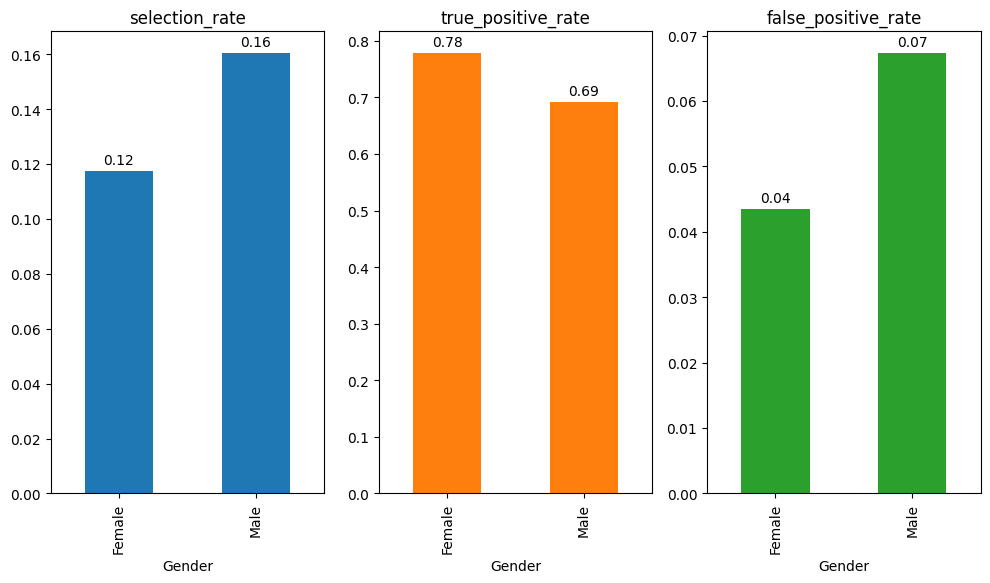



OverTime

          accuracy  selection_rate  true_positive_rate  true_negative_rate  \
OverTime                                                                     
No        0.926829        0.082317             0.56000            0.957096   
Yes       0.876106        0.318584             0.84375            0.888889   

          false_positive_rate  false_negative_rate  balanced_accuracy  
OverTime                                                               
No                   0.042904              0.44000           0.758548  
Yes                  0.111111              0.15625           0.866319  


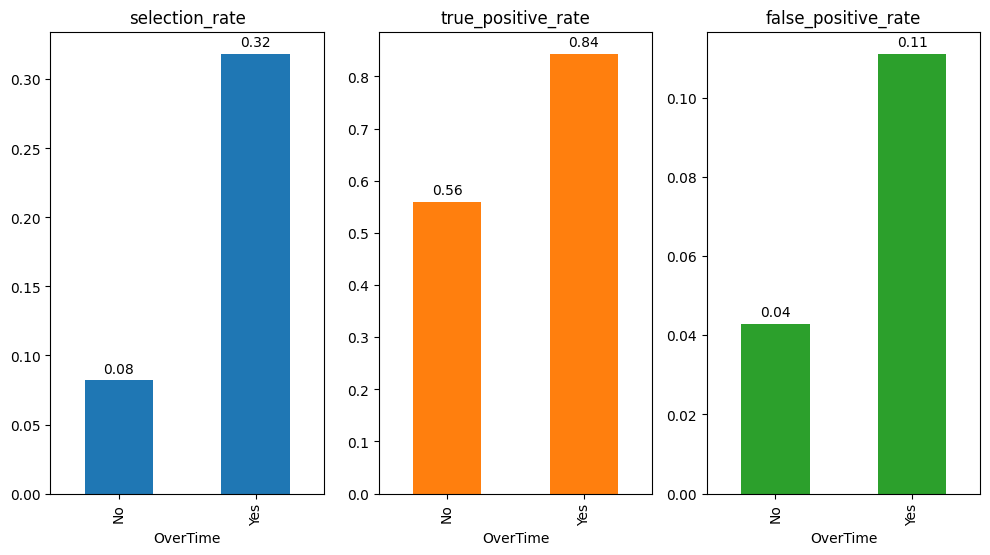



BusinessTravel

                   accuracy  selection_rate  true_positive_rate  \
BusinessTravel                                                    
Non-Travel         0.979592        0.020408            0.500000   
Travel_Frequently  0.875000        0.250000            0.777778   
Travel_Rarely      0.913462        0.134615            0.702703   

                   true_negative_rate  false_positive_rate  \
BusinessTravel                                               
Non-Travel                   1.000000             0.000000   
Travel_Frequently            0.903226             0.096774   
Travel_Rarely                0.941818             0.058182   

                   false_negative_rate  balanced_accuracy  
BusinessTravel                                             
Non-Travel                    0.500000           0.750000  
Travel_Frequently             0.222222           0.840502  
Travel_Rarely                 0.297297           0.822260  


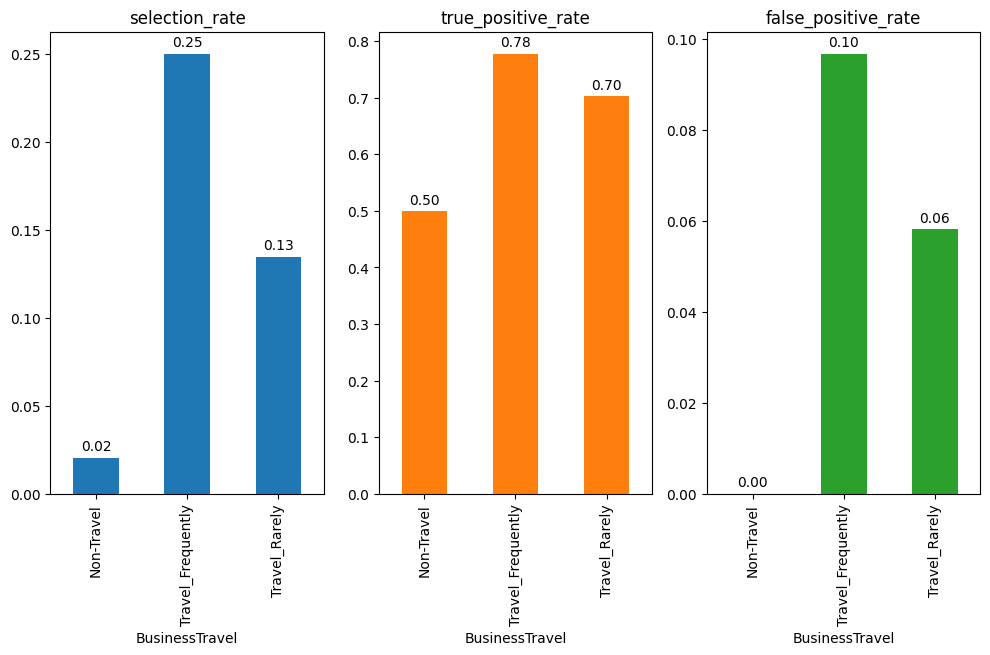



Department

                        accuracy  selection_rate  true_positive_rate  \
Department                                                             
Human Resources         0.800000        0.200000            0.500000   
Research & Development  0.921502        0.098976            0.607143   
Sales                   0.909774        0.233083            0.851852   

                        true_negative_rate  false_positive_rate  \
Department                                                        
Human Resources                   0.846154             0.153846   
Research & Development            0.954717             0.045283   
Sales                             0.924528             0.075472   

                        false_negative_rate  balanced_accuracy  
Department                                                      
Human Resources                    0.500000           0.673077  
Research & Development             0.392857           0.780930  
Sales                        

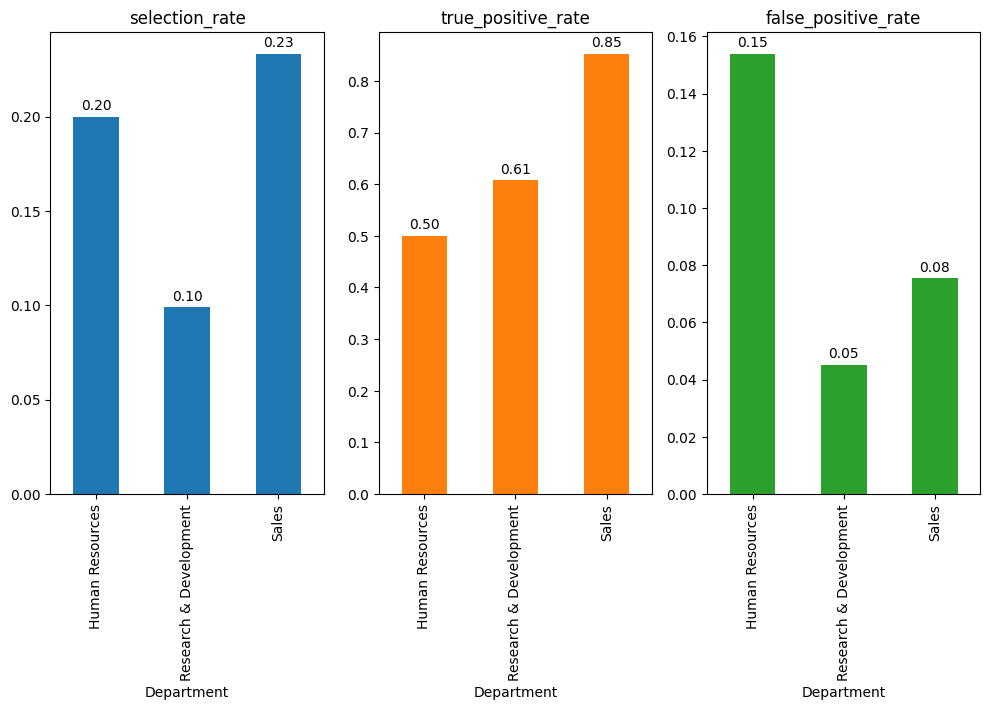



EducationField

                  accuracy  selection_rate  true_positive_rate  \
EducationField                                                   
Human Resources   0.833333        0.166667            0.000000   
Life Sciences     0.921348        0.134831            0.727273   
Marketing         0.910714        0.285714            1.000000   
Medical           0.926471        0.088235            0.562500   
Other             0.950000        0.050000            0.000000   
Technical Degree  0.844444        0.200000            0.625000   

                  true_negative_rate  false_positive_rate  \
EducationField                                              
Human Resources             0.833333             0.166667   
Life Sciences               0.948718             0.051282   
Marketing                   0.888889             0.111111   
Medical                     0.975000             0.025000   
Other                       0.950000             0.050000   
Technical Degree          

d:\OneDrive\Repos\employee-attrition-ibm\.venv\Lib\site-packages\sklearn\metrics\_classification.py:2458: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
d:\OneDrive\Repos\employee-attrition-ibm\.venv\Lib\site-packages\sklearn\metrics\_classification.py:2458: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


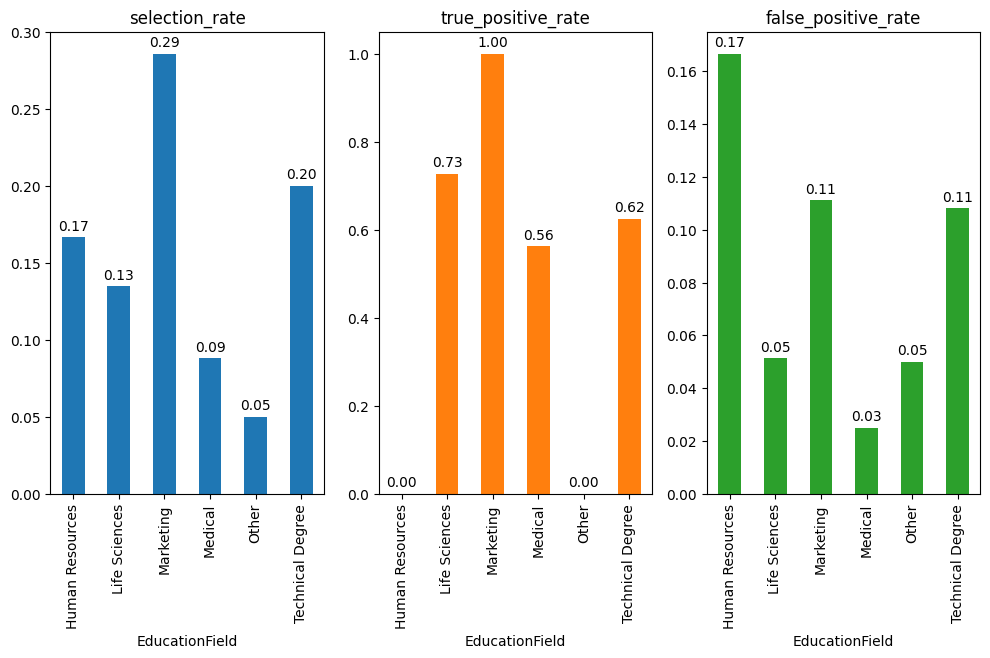



JobRole

                           accuracy  selection_rate  true_positive_rate  \
JobRole                                                                   
Healthcare Representative  1.000000        0.020833            1.000000   
Human Resources            0.785714        0.214286            0.500000   
Laboratory Technician      0.845070        0.211268            0.666667   
Manager                    0.972973        0.000000            0.000000   
Manufacturing Director     0.893617        0.063830            0.000000   
Research Director          0.960000        0.000000            0.000000   
Research Scientist         0.939759        0.120482            0.727273   
Sales Executive            0.912088        0.219780            0.833333   
Sales Representative       0.840000        0.440000            0.888889   

                           true_negative_rate  false_positive_rate  \
JobRole                                                              
Healthcare Representati

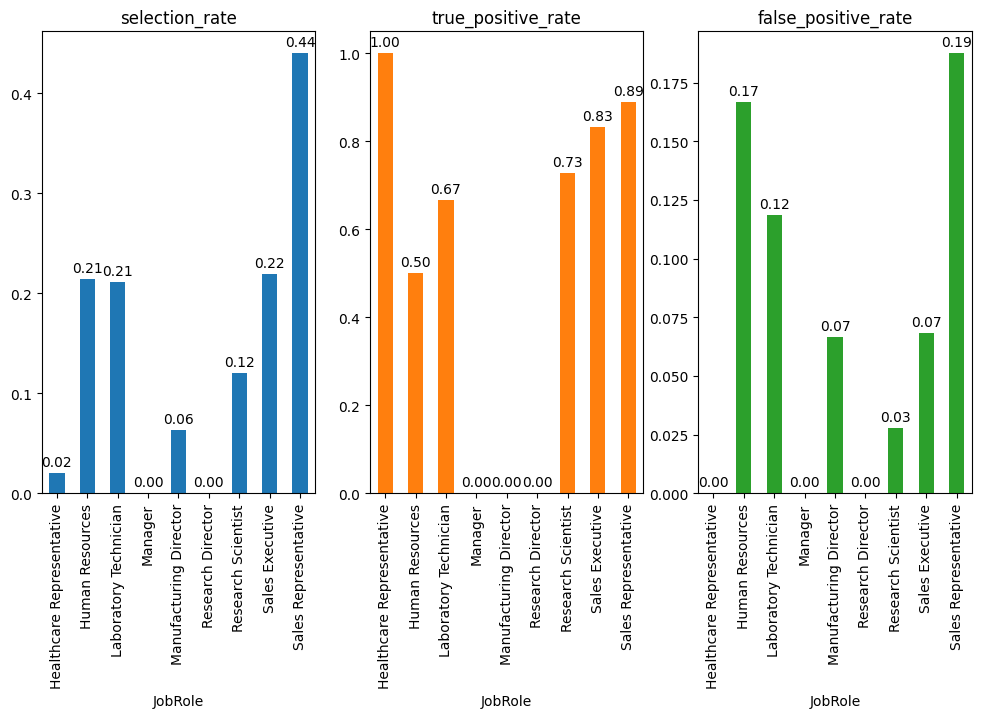



MaritalStatus

               accuracy  selection_rate  true_positive_rate  \
MaritalStatus                                                 
Divorced       0.967742        0.043011            0.600000   
Married        0.936585        0.087805            0.631579   
Single         0.846154        0.286713            0.787879   

               true_negative_rate  false_positive_rate  false_negative_rate  \
MaritalStatus                                                                 
Divorced                 0.988636             0.011364             0.400000   
Married                  0.967742             0.032258             0.368421   
Single                   0.863636             0.136364             0.212121   

               balanced_accuracy  
MaritalStatus                     
Divorced                0.794318  
Married                 0.799660  
Single                  0.825758  


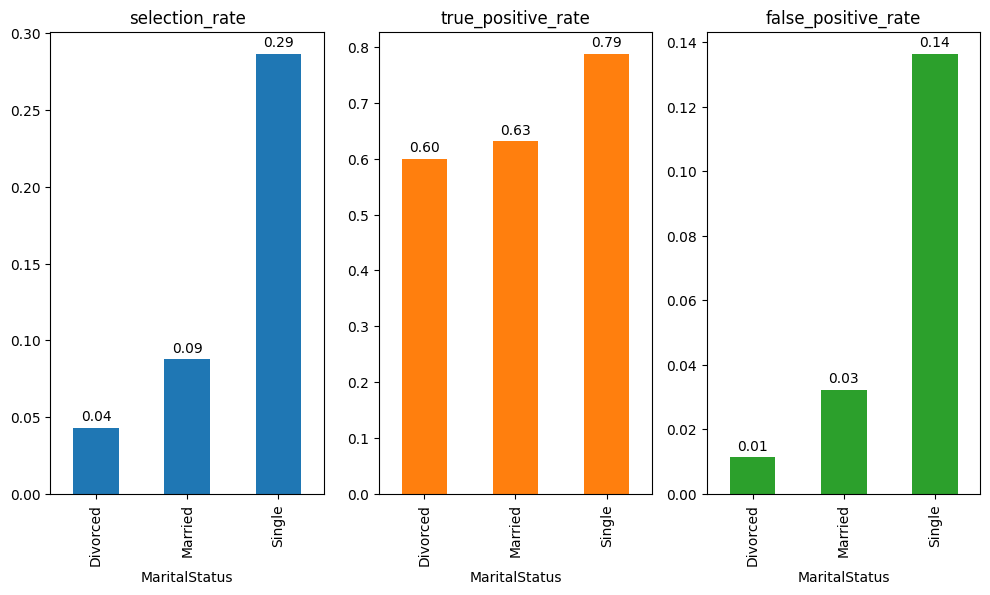

In [58]:
sensitive_attributes = ['Gender', 'OverTime'] + variable_ori_names

for sensitive_attribute in sensitive_attributes:
    print(sensitive_attribute+"\n")
    fairness_eval(sensitive_attribute)
    print("\n")